# Pydantic with gemini

In [7]:
from dotenv import load_dotenv
import os
from google import genai

load_dotenv()

client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))
response = client.models.generate_content(model="gemini-2.5-flash", contents = "tell me a programming joke")
print(response.text)

Why do programmers prefer dark mode?

Because light attracts bugs!


In [12]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents = """
    You are a helpful assistant. I need you to create a JSON object representing a library. 
    The library name should be "Biblioteket" and have the fields name and books that contains a list.
    Each book should have a 'title', 'author', and 'year'. Make sure the output is a single, valid JSON object. 
    Give me 10 books. Remove ```jason and``` from the output.
""")

response.text

'{\n  "name": "Biblioteket",\n  "books": [\n    {\n      "title": "To Kill a Mockingbird",\n      "author": "Harper Lee",\n      "year": 1960\n    },\n    {\n      "title": "1984",\n      "author": "George Orwell",\n      "year": 1949\n    },\n    {\n      "title": "Pride and Prejudice",\n      "author": "Jane Austen",\n      "year": 1813\n    },\n    {\n      "title": "The Great Gatsby",\n      "author": "F. Scott Fitzgerald",\n      "year": 1925\n    },\n    {\n      "title": "Moby Dick",\n      "author": "Herman Melville",\n      "year": 1851\n    },\n    {\n      "title": "War and Peace",\n      "author": "Leo Tolstoy",\n      "year": 1869\n    },\n    {\n      "title": "The Catcher in the Rye",\n      "author": "J.D. Salinger",\n      "year": 1951\n    },\n    {\n      "title": "Dune",\n      "author": "Frank Herbert",\n      "year": 1965\n    },\n    {\n      "title": "The Hobbit",\n      "author": "J.R.R. Tolkien",\n      "year": 1937\n    },\n    {\n      "title": "Sapiens: A B

In [13]:
print(response.text)

{
  "name": "Biblioteket",
  "books": [
    {
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "year": 1960
    },
    {
      "title": "1984",
      "author": "George Orwell",
      "year": 1949
    },
    {
      "title": "Pride and Prejudice",
      "author": "Jane Austen",
      "year": 1813
    },
    {
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "year": 1925
    },
    {
      "title": "Moby Dick",
      "author": "Herman Melville",
      "year": 1851
    },
    {
      "title": "War and Peace",
      "author": "Leo Tolstoy",
      "year": 1869
    },
    {
      "title": "The Catcher in the Rye",
      "author": "J.D. Salinger",
      "year": 1951
    },
    {
      "title": "Dune",
      "author": "Frank Herbert",
      "year": 1965
    },
    {
      "title": "The Hobbit",
      "author": "J.R.R. Tolkien",
      "year": 1937
    },
    {
      "title": "Sapiens: A Brief History of Humankind",
      "author": "Yuval

## pydantic to validate the simulated data

In [15]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title: str
    author: str
    year: int = Field(gt=1000, lt=datetime.now().year) 

class Library(BaseModel):
    name: str
    books: list[Book]

library = Library.model_validate_json(response.text)
library
 

Library(name='Biblioteket', books=[Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960), Book(title='1984', author='George Orwell', year=1949), Book(title='Pride and Prejudice', author='Jane Austen', year=1813), Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925), Book(title='Moby Dick', author='Herman Melville', year=1851), Book(title='War and Peace', author='Leo Tolstoy', year=1869), Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951), Book(title='Dune', author='Frank Herbert', year=1965), Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937), Book(title='Sapiens: A Brief History of Humankind', author='Yuval Noah Harari', year=2011)])

In [16]:
library.name

'Biblioteket'

In [17]:
library.books

[Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960),
 Book(title='1984', author='George Orwell', year=1949),
 Book(title='Pride and Prejudice', author='Jane Austen', year=1813),
 Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925),
 Book(title='Moby Dick', author='Herman Melville', year=1851),
 Book(title='War and Peace', author='Leo Tolstoy', year=1869),
 Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951),
 Book(title='Dune', author='Frank Herbert', year=1965),
 Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937),
 Book(title='Sapiens: A Brief History of Humankind', author='Yuval Noah Harari', year=2011)]

In [18]:
library.books[1]

Book(title='1984', author='George Orwell', year=1949)

In [19]:
library.books[1].title, library.books[1].year

('1984', 1949)

In [20]:
titles = [book.title for book in library.books]
titles

['To Kill a Mockingbird',
 '1984',
 'Pride and Prejudice',
 'The Great Gatsby',
 'Moby Dick',
 'War and Peace',
 'The Catcher in the Rye',
 'Dune',
 'The Hobbit',
 'Sapiens: A Brief History of Humankind']

In [23]:
newer_books = [(book.title, book.year) for book in library.books if book.year > 1959]
newer_books

[('To Kill a Mockingbird', 1960),
 ('Dune', 1965),
 ('Sapiens: A Brief History of Humankind', 2011)]

In [24]:
library.model_dump()

{'name': 'Biblioteket',
 'books': [{'title': 'To Kill a Mockingbird',
   'author': 'Harper Lee',
   'year': 1960},
  {'title': '1984', 'author': 'George Orwell', 'year': 1949},
  {'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813},
  {'title': 'The Great Gatsby', 'author': 'F. Scott Fitzgerald', 'year': 1925},
  {'title': 'Moby Dick', 'author': 'Herman Melville', 'year': 1851},
  {'title': 'War and Peace', 'author': 'Leo Tolstoy', 'year': 1869},
  {'title': 'The Catcher in the Rye', 'author': 'J.D. Salinger', 'year': 1951},
  {'title': 'Dune', 'author': 'Frank Herbert', 'year': 1965},
  {'title': 'The Hobbit', 'author': 'J.R.R. Tolkien', 'year': 1937},
  {'title': 'Sapiens: A Brief History of Humankind',
   'author': 'Yuval Noah Harari',
   'year': 2011}]}

In [27]:
library.model_dump_json(indent=4)

'{\n    "name": "Biblioteket",\n    "books": [\n        {\n            "title": "To Kill a Mockingbird",\n            "author": "Harper Lee",\n            "year": 1960\n        },\n        {\n            "title": "1984",\n            "author": "George Orwell",\n            "year": 1949\n        },\n        {\n            "title": "Pride and Prejudice",\n            "author": "Jane Austen",\n            "year": 1813\n        },\n        {\n            "title": "The Great Gatsby",\n            "author": "F. Scott Fitzgerald",\n            "year": 1925\n        },\n        {\n            "title": "Moby Dick",\n            "author": "Herman Melville",\n            "year": 1851\n        },\n        {\n            "title": "War and Peace",\n            "author": "Leo Tolstoy",\n            "year": 1869\n        },\n        {\n            "title": "The Catcher in the Rye",\n            "author": "J.D. Salinger",\n            "year": 1951\n        },\n        {\n            "title": "Dune",\n 

In [29]:
with open("library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))

create pandas dataframe

In [32]:
import pandas as pd

titles = [book.title for book in library.books]
years = [book.year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "year": years, "author": authors})
df

,title,year,author
0,To Kill a Mockingbird,1960,Harper Lee
1,1984,1949,George Orwell
2,Pride and Prejudice,1813,Jane Austen
3,The Great Gatsby,1925,F. Scott Fitzgerald
4,Moby Dick,1851,Herman Melville
5,War and Peace,1869,Leo Tolstoy
6,The Catcher in the Rye,1951,J.D. Salinger
7,Dune,1965,Frank Herbert
8,The Hobbit,1937,J.R.R. Tolkien
9,Sapiens: A Brief History of Humankind,2011,Yuval Noah Harari


<Axes: ylabel='Frequency'>

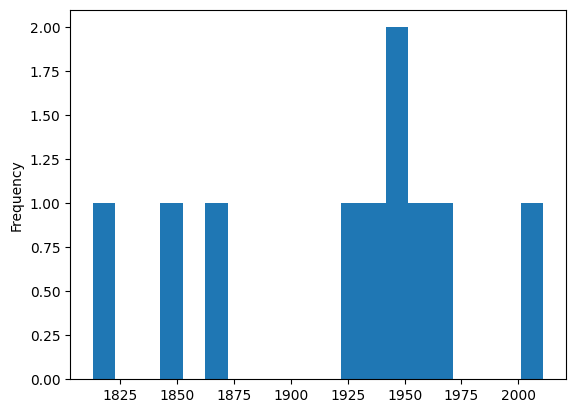

In [33]:
df["year"].plot(kind="hist", bins=20)